In [2]:
import ROOT
import my_library.common_analysis_tools as tools
import my_library.constants as constants
import my_library.kinematic_cuts as cuts

Welcome to JupyROOT 6.24/04


make dalitz plot ppi vs kk

In [3]:
df_pipkmks = tools.get_dataframe('pipkmks', 'spring', 'data')
df_pimkpks = tools.get_dataframe('pimkpks', 'spring', 'data')

In [4]:
df_pipkmks = df_pipkmks.Define('kk_px', 'km_px + ks_px').Define('kk_py', 'km_py + ks_py').Define('kk_pz', 'km_pz + ks_pz').Define('kk_E', 'km_E + ks_E').Define('kk_m', 'sqrt(kk_E*kk_E - kk_px*kk_px - kk_py*kk_py - kk_pz*kk_pz)')
df_pimkpks = df_pimkpks.Define('kk_px', 'kp_px + ks_px').Define('kk_py', 'kp_py + ks_py').Define('kk_pz', 'kp_pz + ks_pz').Define('kk_E', 'kp_E + ks_E').Define('kk_m', 'sqrt(kk_E*kk_E - kk_px*kk_px - kk_py*kk_py - kk_pz*kk_pz)')

In [7]:
hist_2d_pipkmks = df_pipkmks.Histo2D(('kk_pipkmks', 'M(K^{-}K_{s}) vs M(#pi^{+}K^{-}K_{s})', 22, 1.24, 1.35, 50, 0.95, 1.3), 'pipkmks_m', 'kk_m')
hist_2d_pimkpks = df_pimkpks.Histo2D(('kk_pimkpks', 'M(K^{+}K_{s}) vs M(#pi^{-}K^{+}K_{s})', 22, 1.24, 1.35, 50, 0.95, 1.3), 'pimkpks_m', 'kk_m')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


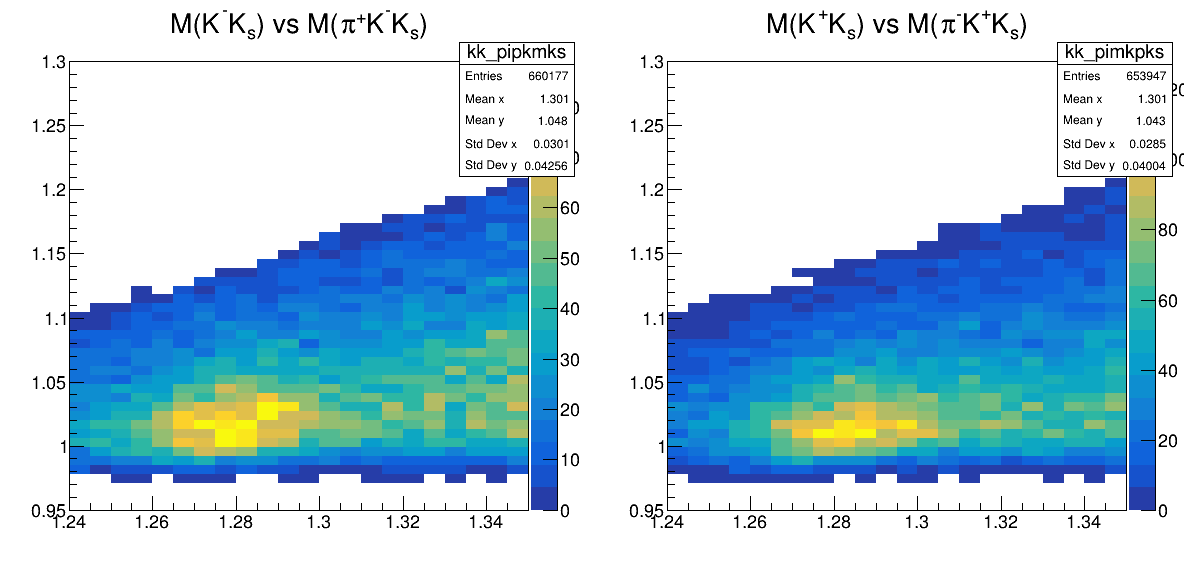

In [8]:
c = ROOT.TCanvas('c', 'c', 1200, 600)
c.Divide(2,1)
c.cd(1)
hist_2d_pipkmks.Draw('colz')
c.cd(2)
hist_2d_pimkpks.Draw('colz')
c.Draw()

In [12]:
hist_pipkmks_before = df_pipkmks.Histo1D(('pipkmks_before', 'M(#pi^{+}K^{-}K_{s})', 22, 1.24, 1.35), 'pipkmks_m')
hist_pipkmks = df_pipkmks.Filter('kk_m > 0.99 && kk_m < 1.05').Histo1D(('pipkmks', 'M(#pi^{+}K^{-}K_{s})', 22, 1.24, 1.35), 'pipkmks_m')
hist_pimkpks_before = df_pimkpks.Histo1D(('pimkpks_before', 'M(#pi^{-}K^{+}K_{s})', 22, 1.24, 1.35), 'pimkpks_m')
hist_pimkpks = df_pimkpks.Filter('kk_m > 0.99 && kk_m < 1.05').Histo1D(('pimkpks', 'M(#pi^{-}K^{+}K_{s})', 22, 1.24, 1.35), 'pimkpks_m')
hist_pipkmks.SetLineColor(ROOT.TColor.GetColor(constants.COLORBLIND_HEX_DICT['blue']))
hist_pipkmks_before.SetLineColor(ROOT.TColor.GetColor(constants.TWELVE_COLORBLIND_HEX_DICT['blue']))
hist_pimkpks.SetLineColor(ROOT.TColor.GetColor(constants.COLORBLIND_HEX_DICT['red']))
hist_pimkpks_before.SetLineColor(ROOT.TColor.GetColor(constants.TWELVE_COLORBLIND_HEX_DICT['red']))
hist_pimkpks.SetTitle('M(KK#pi) for 0.99 < M(KK) < 1.05 GeV')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


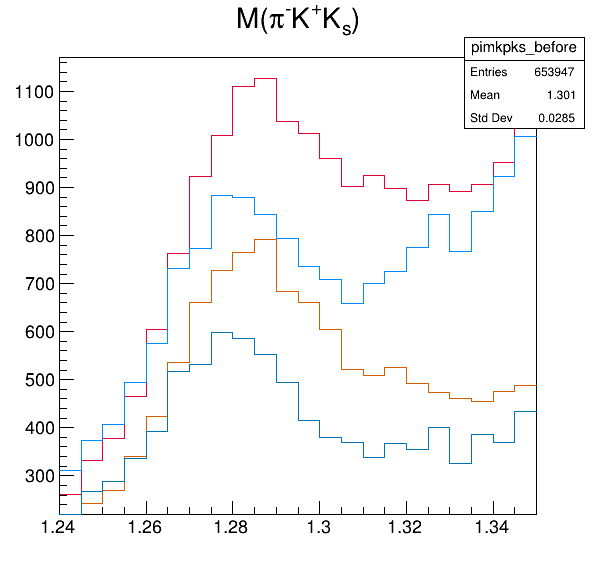

In [13]:
c1 = ROOT.TCanvas('c1', 'c1', 600, 600)
c1.cd()
hist_pimkpks_before.Draw()
hist_pipkmks_before.Draw('same')
hist_pimkpks.Draw('same')
hist_pipkmks.Draw('same')
c1.Draw()